In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def grad(x): #tinh dao ham
    return 2 * x + 5 * np.cos(x)

def cost(x): #tinh gia tri ham so
    return x**2 + 5 * np.sin(x)

def myGD1(eta, x0): #thuat toan Gradient Desent
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)

In [2]:
(x1, it1) = myGD1(.1, -5)
(x2, it2) = myGD1(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations' %(x1[-1], cost(x1[-1]), it1))
print('Solution x1 = %f, cost = %f, obtained after %d iterations' %(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110667, cost = -3.246394, obtained after 11 iterations
Solution x1 = -1.110341, cost = -3.246394, obtained after 29 iterations


Solution found by formula: w =  [[4.0071715  2.98225924]]


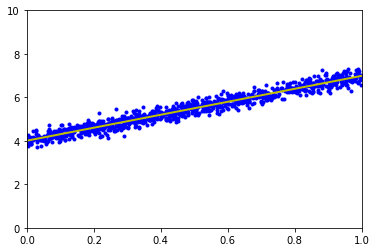

In [3]:
import matplotlib
np.random.seed(2)

X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) #noise

one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ', w_lr.T)

w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1 * x0

plt.plot(X.T, y.T, 'b.') #data
plt.plot(x0, y0, 'y', linewidth=2) #line
plt.axis([0, 1, 0, 10])
plt.show()

In [4]:
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N * np.linalg.norm(y - Xbar.dot(w), 2)**2

#kiem tra dao ham
def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n)) / (2 * eps)
    return g

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False

print('Check gradient...', check_grad(np.random.rand(2, 1), cost, grad))
#Với các hàm số khác, chỉ cần viết lại hàm grad và cost ở phần trên rồi áp dụng code kiểm tra đạo hàm. Nếu hàm số là hàm của một ma trận
#thì thay đổi một chút trong hàm numerical_grad

Check gradient... True


In [5]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new)) / len(w_new) < 1e-3:
            break
        w.append(w_new)
    return (w, it)

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found bt GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found bt GD: w =  [[4.02199496 2.95380036]] ,
after 50 iterations.


In [6]:
def has_converged(w_new, grad):
    return np.linalg.norm(grad(w_new))/len(w_new) < 1e-3

def GD_momentum(w_init, grad, eta, gamma):
    w = [w_init]
    v = [np.zeros_like(w_init)]
    for it in range(100):
        v_new = gamma*v[-1] + eta*grad(w[-1])
        w_new = w[-1] - v_new
        if has_converged(w_new, grad):
            break
        w.append(w_new)
        v.append(v_new)
    return (w, it)
w_init = np.array([[2], [1]])
(w_m, it_m) = GD_momentum(w_init, grad, .5, 0.9)

In [7]:
N = X.shape[0]
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N
e1 = -2*X.T.dot(y)/N

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
xg = np.arange(1.5, 7.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = a1 + Xg**2 + b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

MovieWriter imagemagick unavailable; using Pillow instead.


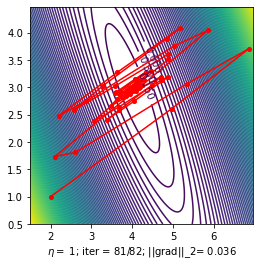

In [9]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def save_gif2(eta, gamma):
    (w, it) = GD_momentum(w_init, grad, eta, gamma)
    fig, ax = plt.subplots(figsize=(4, 4))
    plt.cla()
    plt.axis([1.5, 7, 0.5, 4.5])
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            anomlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            plt.plot(w_lr[0], w_lr[1], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro', markersize = 4)
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2= %.3f' %np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax
    
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = 'LR_momentum_contours.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')
    
eta = 1
gamma = .9
save_gif2(eta, gamma)

In [10]:
#Nesterov accelerated gradient (NAG)
def GD_NAG(w_init, grad, eta, gamma):
    w = [w_init]
    v = [np.zeros_like(w_init)]
    for it in range(100):
        v_new = gamma*v[-1] + eta*grad(w[-1] - gamma*v[-1]) #Cong thuc cap nhat cua NAG (dao ham thay doi)
        w_new = w[-1] - v_new
        
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
        v.append(v_new)
    return (w, it)
w_init = np.array([[2], [1]])
(w_m, it_m) = GD_NAG(w_init, grad, .5, .9)

In [11]:
N = X.shape[0]
a1 = np.linalg.norm(y, 2)**2/N
b1 = 2*np.sum(X)/N
c1 = np.linalg.norm(X, 2)**2/N
d1 = -2*np.sum(y)/N
e1 = -2*X.T.dot(y)/N

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
xg = np.arange(1.5, 7.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = a1 + Xg**2 + b1*Xg*Yg + c1*Yg**2 + d1*Xg + e1*Yg

MovieWriter imagemagick unavailable; using Pillow instead.


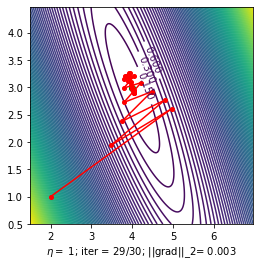

In [13]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def save_gif2(eta, gamma):
    (w, it) = GD_NAG(w_init, grad, eta, gamma)
    fig, ax = plt.subplots(figsize=(4, 4))
    plt.cla()
    plt.axis([1.5, 7, 0.5, 4.5])
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            anomlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            plt.plot(w_lr[0], w_lr[1], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro', markersize = 4)
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2= %.3f' %np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax
    
    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = 'LR_NAG_contours.gif'
    anim1.save(fn, dpi=100, writer='imagemagick')
    
eta = 1
gamma = .9
save_gif2(eta, gamma)